## Problem Statement:

An online retail (E commerce) company want to know the customers who are going to churn, so accordingly they can approach customer to offer some promotional offers. The objective of this exercise is to build the “Customer Churn Model” and to determine if the current churn rate can be brought down significantly and to get more insights about those customers. The current churn rate of this online ecommerce company is approximately 16.8%.

**Data Dictionary:**

**1. CustomerID** : Unique customer ID.

**2. Churn** : Churn Flag

**3. Tenure** : Tenure of customer in organization

**4. PreferredLoginDevice** : Preferred login device of customer

**5. CityTier** : City tier

**6. WarehouseToHome** : Distance in between warehouse to home of customer

**7. PreferredPaymentMode** : Preferred payment method of customer

**8. Gender** : Gender of customer

**9. HourSpendOnApp** : Number of hours spend on mobile application or website

**10. NumberOfDeviceRegistered** : Total number of deceives is registered on particular customer.

**11. PreferedOrderCat** : Preferred order category of customer in last month

**12. SatisfactionScore** : Satisfactory score of customer on service

**13. MaritalStatus** : Marital status of customer

**14. NumberOfAddress** : Total number of added added on particular customer

**15. Complain** : Any complaint has been raised in last month

**16. OrderAmountHikeFromlastYear** : Percentage increases in order from last year

**17. CouponUsed** : Total number of coupon has been used in last month

**18. OrderCount** : Total number of orders has been places in last month

**19. DaySinceLastOrder** : Day Since last order by customer

**20. CashbackAmount** : Average cashback in last month


An online retail (E commerce) company want to know the customers who are going to churn, so accordingly they can approach customer to offer some promos

### Importing necessary libraries- 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
 

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier


### Basic data summary, Univariate, Bivariate analysis, graphs, checking correlations, outliers and missing values treatment (if necessary) and check the basic descriptive statistics of the dataset.

In [20]:
df = pd.read_csv('EDA.csv')
#df = pd.read_excel('ECommerceDataset.xlsx')

In [21]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


**Columns**

In [22]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [23]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

#Replacing null values with the median value of therir particular columns.

In [24]:
df.drop(['CustomerID'], axis = 1, inplace=True)

#dropping customerID as it is not significant variable

In [25]:
df.PreferredPaymentMode.replace(('E wallet'), ('E_wallet'), inplace=True)
df.PreferredLoginDevice.replace(('Mobile Phone'), ('Mobile_Phone'), inplace=True) 
df.PreferredPaymentMode.replace(('Cash on Delivery'), ('Cash_on_Delivery'), inplace=True) 
df.PreferredPaymentMode.replace(('Credit Card'), ('Credit_Card'), inplace=True) 
df.PreferredPaymentMode.replace(('Debit Card'), ('Debit_Card'), inplace=True) 

df.PreferedOrderCat.replace(('Laptop & Accessory'), ('Laptop_Accessory'), inplace=True) 
df.PreferedOrderCat.replace(('Mobile Phone'), ('Mobile_Phone'), inplace=True) 
df.PreferedOrderCat.replace(('Debit Card'), ('Debit_Card'), inplace=True)

In [26]:
df.SatisfactionScore = df.SatisfactionScore.astype('object')
df.Churn = df.Churn.astype('object')
df.Complain = df.Complain.astype('object')
df.CityTier = df.CityTier.astype('object')

In [27]:
#df.drop_duplicates(inplace=True)

In [28]:
Q1 = df['CashbackAmount'].quantile(0.25)
Q3 = df['CashbackAmount'].quantile(0.75)
IQR = Q3-Q1
IQR

50.0

In [29]:
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [30]:
df[( df['CashbackAmount'] < LL ) | (df['CashbackAmount'] > UL)]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,1,4.0,Mobile_Phone,1,18.0,Cash_on_Delivery,Female,2.0,3,Others,3,Divorced,2,0,15.0,9.0,15.0,8.0,295
40,0,23.0,Mobile_Phone,1,17.0,Debit_Card,Female,2.0,3,Others,4,Single,4,0,15.0,2.0,4.0,4.0,299
61,0,13.0,Mobile_Phone,1,10.0,Credit_Card,Female,2.0,3,Others,3,Divorced,2,0,14.0,1.0,9.0,9.0,290
62,0,28.0,Mobile_Phone,1,20.0,Credit_Card,Male,3.0,2,Others,4,Single,9,0,11.0,1.0,2.0,15.0,287
65,0,25.0,Mobile_Phone,1,6.0,Debit_Card,Male,3.0,4,Others,3,Divorced,1,0,15.0,1.0,11.0,9.0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0,61.0,Mobile_Phone,3,28.0,Debit_Card,Female,4.0,4,Grocery,1,Married,6,1,15.0,1.0,2.0,1.0,304
5537,0,23.0,Computer,1,9.0,Debit_Card,Male,3.0,4,Others,1,Married,5,0,15.0,5.0,5.0,4.0,317
5561,0,29.0,Mobile_Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,15.0,2.0,2.0,5.0,321
5597,0,13.0,Computer,1,16.0,Debit_Card,Male,3.0,4,Others,1,Single,4,0,15.0,2.0,2.0,4.0,319


In [31]:
df1 = df[(df['CashbackAmount'] > LL) & (df['CashbackAmount'] < UL)]


In [32]:
df1

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile_Phone,3,6.0,Debit_Card,Female,3.0,3,Laptop_Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit_Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit_Card,Male,2.0,4,Laptop_Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit_Card,Male,3.0,2,Laptop_Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile_Phone,1,13.0,Credit_Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile_Phone,1,11.0,Debit_Card,Male,3.0,2,Laptop_Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit_Card,Male,4.0,5,Laptop_Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


**Shape**

In [33]:
Q1 = df1['Tenure'].quantile(0.25)
Q3 = df1['Tenure'].quantile(0.75)
IQR = Q3-Q1
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [34]:
df1[df1['Tenure'] > UL].shape[0]

2

In [35]:
df2 = df1[df1['Tenure'] < UL]
df2

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile_Phone,3,6.0,Debit_Card,Female,3.0,3,Laptop_Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit_Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit_Card,Male,2.0,4,Laptop_Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit_Card,Male,3.0,2,Laptop_Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile_Phone,1,13.0,Credit_Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile_Phone,1,11.0,Debit_Card,Male,3.0,2,Laptop_Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit_Card,Male,4.0,5,Laptop_Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [36]:
Q1 = df2['WarehouseToHome'].quantile(0.25)
Q3 = df2['WarehouseToHome'].quantile(0.75)
IQR = Q3-Q1
LL = Q1 - 3 * IQR
UL = Q3 + 3 * IQR

In [37]:
df2[df2['WarehouseToHome'] > UL].shape[0]

2

In [38]:
df3 = df2[df2['WarehouseToHome'] < UL]
df3

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile_Phone,3,6.0,Debit_Card,Female,3.0,3,Laptop_Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit_Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit_Card,Male,2.0,4,Laptop_Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit_Card,Male,3.0,2,Laptop_Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile_Phone,1,13.0,Credit_Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile_Phone,1,11.0,Debit_Card,Male,3.0,2,Laptop_Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit_Card,Male,4.0,5,Laptop_Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [39]:
Q1 = df3['NumberOfAddress'].quantile(0.25)
Q3 = df3['NumberOfAddress'].quantile(0.75)
IQR = Q3-Q1
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [40]:
df3[df3['NumberOfAddress'] > UL].shape[0]

4

In [41]:
df4 = df3[df3['NumberOfAddress'] < UL]


In [42]:
Q1 = df4['DaySinceLastOrder'].quantile(0.25)
Q3 = df4['DaySinceLastOrder'].quantile(0.75)
IQR = Q3-Q1
LL = Q1 - 3 * IQR
UL = Q3 + 3 * IQR

In [43]:
df4[df4['DaySinceLastOrder'] > UL].shape[0]

3

In [44]:
df5 = df4[df4['DaySinceLastOrder'] < UL]
df5

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile_Phone,3,6.0,Debit_Card,Female,3.0,3,Laptop_Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit_Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit_Card,Male,2.0,4,Laptop_Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit_Card,Male,3.0,2,Laptop_Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile_Phone,1,13.0,Credit_Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile_Phone,1,11.0,Debit_Card,Male,3.0,2,Laptop_Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit_Card,Male,4.0,5,Laptop_Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [45]:
df5.SatisfactionScore = df5.SatisfactionScore.astype('int')
df5.Churn = df5.Churn.astype('int')
df5.Complain = df5.Complain.astype('int')
df5.CityTier = df5.CityTier.astype('int')

In [46]:
data = df5.copy()

**Number of duplicate rows present**

### Split the data into train and test in the ratio 70:30. Is scaling necessary or not?

**Scaling-** 

Scaling of variables is optional for linear models such as Linear regression, logistic regression, LDA and tree based models such as Random forest. However scaling is a necessity when using Distance based models such as KNN and SVM.   
It should be noted that, scaling should only be done after train test split , meaning the parameters(mean, or min max) learned from the train set be applied to scale the test set to make sure that test data is unseen during the training phase.  

#### Splitting data into train and test (70:30) 

In [47]:
# Seperating the Dependent variable - 
y= data['Churn']
data = data.drop('Churn',axis=1)


Encoding Target variable - 

It is better to encode target variable for ease in plotting ROC curve

Public Transport = 1 ;
Private Transport = 0

In [48]:
y.value_counts()  #check 

0    4241
1     925
Name: Churn, dtype: int64

#### Encoding  

In [49]:
data = pd.get_dummies(data,drop_first=True)


In [50]:
data.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit_Card,PreferredPaymentMode_E_wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop_Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile_Phone,MaritalStatus_Married,MaritalStatus_Single
0,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,...,1,0,0,0,0,1,0,0,0,1
1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,...,0,0,1,1,0,0,1,0,0,1
2,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,...,1,0,0,1,0,0,1,0,0,1
3,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,...,1,0,0,1,0,1,0,0,0,1
4,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,...,0,0,0,1,0,0,1,0,0,1


#### As all the values are numeric, the data is ready for modelling. 

In [51]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=100,stratify=y)  
# using startify = y , we ensure that train test split has equal proportions of classes of target variable y. 

In [52]:
# Check - 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3616, 28), (1550, 28), (3616,), (1550,))

In [53]:
y_train.value_counts()

0    2969
1     647
Name: Churn, dtype: int64

In [54]:
y_test.value_counts()

0    1272
1     278
Name: Churn, dtype: int64

###  Build the following models on the 70% training data and check the performance of these models on the Training as well as the 30% Test data using the various inferences from the Confusion Matrix and plotting a AUC-ROC curve along with the AUC values. Tune the models wherever required for optimum performance.:




In [55]:
# creating a DataFrame to store results - 
results = pd.DataFrame(dtype='int',columns=[['Train_Accuracy','Test_Accuracy','Train_ROC-AUC','Test_ROC-AUC']],
                       index=['Log_R','LDA','CART','NB','KNN','RF','GB'])

In [56]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
Log_R,NaN,NaN,NaN,NaN
LDA,NaN,NaN,NaN,NaN
CART,NaN,NaN,NaN,NaN
NB,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
RF,NaN,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN


#### a. Logistic Regression - 

In [57]:
log_r=LogisticRegression(random_state=100,max_iter=10000)
log_r.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=100)

In [58]:
results.loc['Log_R',:] = [accuracy_score(y_train,log_r.predict(X_train)),accuracy_score(y_test,log_r.predict(X_test)),
               roc_auc_score(y_train,log_r.predict_proba(X_train)[:,1]),roc_auc_score(y_test,log_r.predict_proba(X_test)[:,1])]
print("Train Accuracy is : {}".format(accuracy_score(y_train,log_r.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,log_r.predict(X_test))))



print("\n Train ROC-AUC score is : {}".format(roc_auc_score(y_train,log_r.predict_proba(X_train)[:,1])))
print("\n Test ROC-AUC score is : {}".format(roc_auc_score(y_test,log_r.predict_proba(X_test)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,log_r.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,log_r.predict(X_test)))



Train Accuracy is : 0.8857853982300885

Test Accuracy is : 0.8883870967741936

 Train ROC-AUC score is : 0.8890154471007208

 Test ROC-AUC score is : 0.9009971268268404

Confusion matrix for train set :  
 [[2869  100]
 [ 313  334]]

Confusion matrix for test set :  
 [[1223   49]
 [ 124  154]]


In [59]:
print('Classification report Train set :')
print(classification_report(y_train,log_r.predict(X_train)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2969
           1       0.77      0.52      0.62       647

    accuracy                           0.89      3616
   macro avg       0.84      0.74      0.78      3616
weighted avg       0.88      0.89      0.88      3616



In [60]:
print('Classification report Test set :')
print(classification_report(y_test,log_r.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1272
           1       0.76      0.55      0.64       278

    accuracy                           0.89      1550
   macro avg       0.83      0.76      0.79      1550
weighted avg       0.88      0.89      0.88      1550



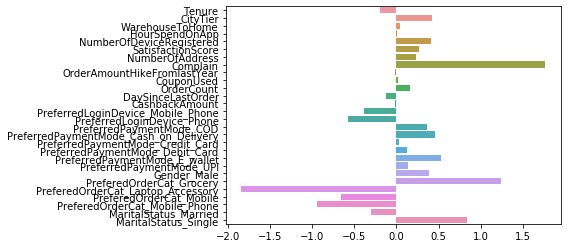

In [61]:
# Coefficient values- 
sns.barplot(x=[i for i in log_r.coef_[0]],y=X_train.columns)
plt.show()

Logistic on Train: ROC AUC=0.889
Logistic on Test: ROC AUC=0.901


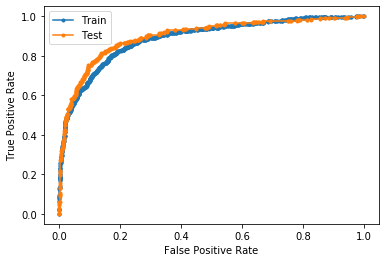

In [62]:
lr_probs = log_r.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Logistic on Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = log_r.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic on Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Inferences- 
1. Independent variables with larger absolute values have a greater impact on the target variable
2. Order of importance of predictors- Complain > PreferedOrderCat_Laptop_Accessory > PreferedOrderCat_Grocery >  MaritalStatus_Single > PreferedOrderCat_Mobile_Phone > PreferedOrderCat_Mobile > PreferredPaymentMode_COD > PreferredPaymentMode_E_wallet > PreferredLoginDevice_Phone > CityTier > NumberOfDeviceRegistered >PreferredLoginDevice_Mobile_Phone> Gender_Male >PreferredPaymentMode_Debit_Card > SatisfactionScore > NumberOfAddress > Tenure
3. WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear,  CouponUsed , OrderCount, DaySinceLastOrder, CashbackAmount,
PreferredPaymentMode_Credit_Card, PreferredPaymentMode_UPI, MaritalStatus_Married and Tenure are again least important predictors


## LDA 

In [63]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [64]:
results.loc['LDA',:] = [accuracy_score(y_train,lda.predict(X_train)),
                          accuracy_score(y_test,lda.predict(X_test)),
                          roc_auc_score(y_train,lda.predict_proba(X_train)[:,1]),
                          roc_auc_score(y_test,lda.predict_proba(X_test)[:,1])]



print("Train Accuracy is : {}".format(accuracy_score(y_train,lda.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,lda.predict(X_test))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,lda.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,lda.predict_proba(X_test)[:,1])))


print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,lda.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,lda.predict(X_test)))


Train Accuracy is : 0.8830199115044248

Test Accuracy is : 0.8870967741935484

Train ROC-AUC score is : 0.883869536993029

Test ROC-AUC score is : 0.8944250260169223

Confusion matrix for train set :  
 [[2875   94]
 [ 329  318]]

Confusion matrix for test set :  
 [[1227   45]
 [ 130  148]]


In [65]:
print('Classification report Train set :')
print(classification_report(y_train,lda.predict(X_train)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2969
           1       0.77      0.49      0.60       647

    accuracy                           0.88      3616
   macro avg       0.83      0.73      0.77      3616
weighted avg       0.87      0.88      0.87      3616



In [66]:
print('Classification report Test set :')
print(classification_report(y_test,lda.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1272
           1       0.77      0.53      0.63       278

    accuracy                           0.89      1550
   macro avg       0.84      0.75      0.78      1550
weighted avg       0.88      0.89      0.88      1550



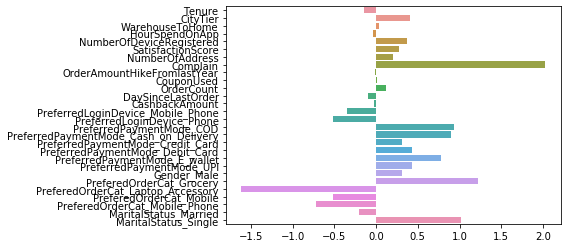

In [67]:
# Coefficient values- 
sns.barplot(x=[i for i in lda.coef_[0]],y=X_train.columns)
plt.show()

LDA Train: ROC AUC=0.884
LDA Test: ROC AUC=0.894


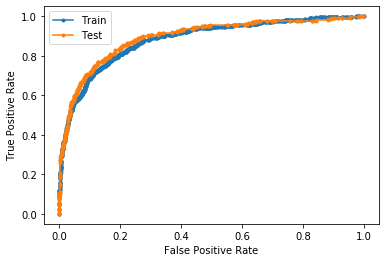

In [68]:
lr_probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('LDA Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('LDA Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Inferences- 
1. Independent variables with larger absolute values have a greater impact on the target variable
2. Order of importance of predictors- Complain > PreferedOrderCat_Laptop_Accessory > PreferedOrderCat_Grocery >  MaritalStatus_Single > PreferedOrderCat_Mobile_Phone > PreferedOrderCat_Mobile > PreferredPaymentMode_COD > PreferredPaymentMode_E_wallet > PreferredLoginDevice_Phone > CityTier > NumberOfDeviceRegistered >PreferredLoginDevice_Mobile_Phone> Gender_Male >PreferredPaymentMode_Debit_Card > SatisfactionScore > NumberOfAddress > Tenure
3. WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear,  CouponUsed , OrderCount, DaySinceLastOrder, CashbackAmount,
PreferredPaymentMode_Credit_Card, PreferredPaymentMode_UPI, MaritalStatus_Married and Tenure are again least important predictors. 



## KNN Classifier- 

As mentioned earlier we need to do scaling before using distance based models. Standard Scaling , or Min-Max scaling either one of these can used.

In [69]:
X_train.columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile_Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash_on_Delivery',
       'PreferredPaymentMode_Credit_Card', 'PreferredPaymentMode_Debit_Card',
       'PreferredPaymentMode_E_wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop_Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile_Phone', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [70]:
sc=StandardScaler()

In [71]:
X_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [72]:
knn=KNeighborsClassifier()
knn.fit(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']],y_train)

KNeighborsClassifier()

In [73]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,knn.predict(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']]))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']]))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,knn.predict_proba(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,knn.predict(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Train Accuracy is : 0.9139933628318584

Test Accuracy is : 0.8670967741935484

Train ROC-AUC score is : 0.9637985093779462

Test ROC-AUC score is : 0.8675837631781369

Confusion matrix for train set :  
 [[2890   79]
 [ 232  415]]

Confusion matrix for test set :  
 [[1213   59]
 [ 147  131]]


In [74]:
print('Classification report Train set :')
print(classification_report(y_train,knn.predict(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2969
           1       0.84      0.64      0.73       647

    accuracy                           0.91      3616
   macro avg       0.88      0.81      0.84      3616
weighted avg       0.91      0.91      0.91      3616



In [75]:
print('Classification report Train set :')
print(classification_report(y_test,knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1272
           1       0.69      0.47      0.56       278

    accuracy                           0.87      1550
   macro avg       0.79      0.71      0.74      1550
weighted avg       0.86      0.87      0.86      1550



Hyper parameter tuning of KNN Classifier- 

In [76]:
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
         'weights':['uniform', 'distance'],'p':[1,2,3,4]}

In [77]:
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1)
grid_knn.fit(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']],y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [78]:
grid_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [79]:


print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_knn.predict(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']]))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']]))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_knn.predict_proba(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_knn.predict(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Train Accuracy is : 0.9925331858407079

Test Accuracy is : 0.9361290322580645

Train ROC-AUC score is : 0.9997938512491

Test ROC-AUC score is : 0.9398118297814579

Confusion matrix for train set :  
 [[2964    5]
 [  22  625]]

Confusion matrix for test set :  
 [[1231   41]
 [  58  220]]


In [80]:
print('Classification report Train set :')
print(classification_report(y_train,grid_knn.predict(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2969
           1       0.99      0.97      0.98       647

    accuracy                           0.99      3616
   macro avg       0.99      0.98      0.99      3616
weighted avg       0.99      0.99      0.99      3616



In [81]:
print('Classification report Test set :')
print(classification_report(y_test,grid_knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1272
           1       0.84      0.79      0.82       278

    accuracy                           0.94      1550
   macro avg       0.90      0.88      0.89      1550
weighted avg       0.93      0.94      0.94      1550



In [82]:
grid_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

KNN Classifier Train: ROC AUC=1.000
KNN Classifier Test: ROC AUC=0.940


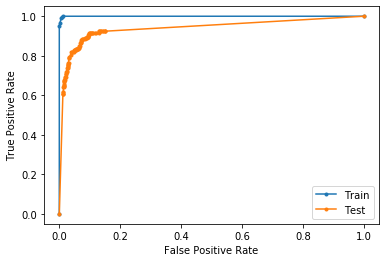

In [83]:
results.loc['KNN',:] = [accuracy_score(y_train,grid_knn.predict(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])),
                          accuracy_score(y_test,grid_knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])),
                          roc_auc_score(y_train,grid_knn.predict_proba(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1]),
                          roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])]

lr_probs = grid_knn.predict_proba(X_train_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('KNN Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = grid_knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Inferences -** 
1. KNN models with a small sample size, but a good amount of features usually suffers from overfitting. Hence 'CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single' were used to make the model.  
2. Hyperparameter tuning of select parameters improves the accuracy scores but by a very small margin
3. The optimum number of neighbours come out to be 3 and the weights parameter 'uniform' gives better results.
4. The scores would vary if we take a different set of variables. To utilise each variable for our model, we need more sample.

## Naive Bayes

In [84]:
naiv_b=GaussianNB()
naiv_b.fit(X_train_sc,y_train)


GaussianNB()

In [85]:
results.loc['NB',:] = [accuracy_score(y_train,naiv_b.predict(X_train_sc)),
                          accuracy_score(y_test,naiv_b.predict(X_test_sc)),
                          roc_auc_score(y_train,naiv_b.predict_proba(X_train_sc)[:,1]),
                          roc_auc_score(y_test,naiv_b.predict_proba(X_test_sc)[:,1])]


print("Train Accuracy is : {}".format(accuracy_score(y_train,naiv_b.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,naiv_b.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,naiv_b.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,naiv_b.predict_proba(X_test_sc)[:,1])))


print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,naiv_b.predict(X_train_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,naiv_b.predict(X_test_sc)))

Train Accuracy is : 0.7878871681415929

Test Accuracy is : 0.7838709677419354

Train ROC-AUC score is : 0.8055049004577439

Test ROC-AUC score is : 0.8102461427084747

Confusion matrix for train set :  
 [[2435  534]
 [ 233  414]]

Confusion matrix for test set :  
 [[1031  241]
 [  94  184]]


In [86]:
results.loc['NB']

Train_Accuracy    0.787887
Test_Accuracy     0.783871
Train_ROC-AUC     0.805505
Test_ROC-AUC      0.810246
Name: NB, dtype: float64

In [87]:
print('Classification report Train set :')
print(classification_report(y_train,naiv_b.predict(X_train_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2969
           1       0.44      0.64      0.52       647

    accuracy                           0.79      3616
   macro avg       0.67      0.73      0.69      3616
weighted avg       0.83      0.79      0.80      3616



In [88]:
print('Classification report Test set :')
print(classification_report(y_test,naiv_b.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1272
           1       0.43      0.66      0.52       278

    accuracy                           0.78      1550
   macro avg       0.67      0.74      0.69      1550
weighted avg       0.83      0.78      0.80      1550



Naive Bayes on Train: ROC AUC=0.806
Naive Bayes: ROC AUC=0.810


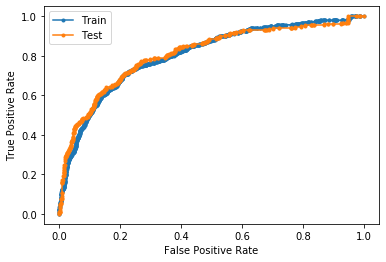

In [89]:
lr_probs = naiv_b.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Naive Bayes on Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = naiv_b.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Inferences- 
1. We observe that NB Classifier model performs a bit better on the test data (Accuracy score), it may be because of the small sample size and/or a different underlying distribution in both the datasets.
2. Naive Bayes assumes that all the variables are independent, which clearly is not the case here . Hence we do not expect good results from NB anyways. 


## Decision Tree Classifier - 

In [90]:
dt = DecisionTreeClassifier(random_state=100 )  
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier(random_state=100)

In [91]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,dt.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,dt.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,dt.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,dt.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,dt.predict(X_train_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,dt.predict(X_test_sc)))

Train Accuracy is : 1.0

Test Accuracy is : 0.9496774193548387

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.9187423645988869

Confusion matrix for train set :  
 [[2969    0]
 [   0  647]]

Confusion matrix for test set :  
 [[1230   42]
 [  36  242]]


In [92]:
print('Classification report Train set :')
print(classification_report(y_train,dt.predict(X_train_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       647

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616



In [93]:
print('Classification report Test set :')
print(classification_report(y_test,dt.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1272
           1       0.85      0.87      0.86       278

    accuracy                           0.95      1550
   macro avg       0.91      0.92      0.92      1550
weighted avg       0.95      0.95      0.95      1550



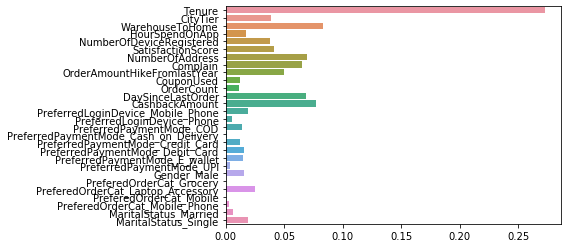

In [94]:
# Coefficient values- 
sns.barplot(x=[i for i in dt.feature_importances_],y=X_train.columns)
plt.show()

Hyperparameter tuning of Decision Tree  - 

In [95]:
parameters = {'max_depth':[5,6,7,8,9,10],'min_samples_split':[5,6,7,8,9,10],
              'criterion':["gini","entropy"],'random_state': [100]}

In [96]:
grid_dt = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,refit=True,verbose=1)
grid_dt.fit(X_train_sc,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10],
                         'random_state': [100]},
             verbose=1)

In [97]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 5,
 'random_state': 100}

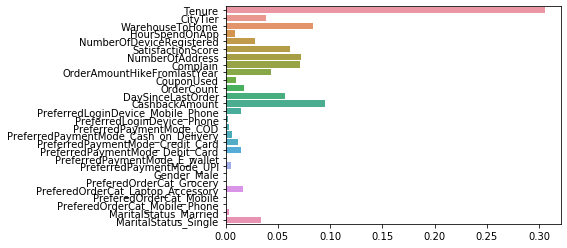

In [98]:
# Coefficient values- 
sns.barplot(x=[i for i in grid_dt.best_estimator_.feature_importances_],y=X_train.columns)
plt.show()

In [99]:
results.loc['CART',:] = [accuracy_score(y_train,grid_dt.predict(X_train_sc)),
                          accuracy_score(y_test,grid_dt.predict(X_test_sc)),
                          roc_auc_score(y_train,grid_dt.predict_proba(X_train_sc)[:,1]),
                          roc_auc_score(y_test,grid_dt.predict_proba(X_test_sc)[:,1])]


print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_dt.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_dt.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_dt.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_dt.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_dt.predict(X_train_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_dt.predict(X_test_sc)))

Train Accuracy is : 0.9607300884955752

Test Accuracy is : 0.9251612903225807

Train ROC-AUC score is : 0.9899200548897078

Test ROC-AUC score is : 0.9345306773449165

Confusion matrix for train set :  
 [[2927   42]
 [ 100  547]]

Confusion matrix for test set :  
 [[1219   53]
 [  63  215]]


In [100]:
results.loc['CART']

Train_Accuracy    0.960730
Test_Accuracy     0.925161
Train_ROC-AUC     0.989920
Test_ROC-AUC      0.934531
Name: CART, dtype: float64

In [101]:
print('Classification report Train set :')
print(classification_report(y_train,grid_dt.predict(X_train_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2969
           1       0.93      0.85      0.89       647

    accuracy                           0.96      3616
   macro avg       0.95      0.92      0.93      3616
weighted avg       0.96      0.96      0.96      3616



In [102]:
print('Classification report Test set :')
print(classification_report(y_test,grid_dt.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1272
           1       0.80      0.77      0.79       278

    accuracy                           0.93      1550
   macro avg       0.88      0.87      0.87      1550
weighted avg       0.92      0.93      0.92      1550



CART Train: ROC AUC=0.990
CART Test: ROC AUC=0.935


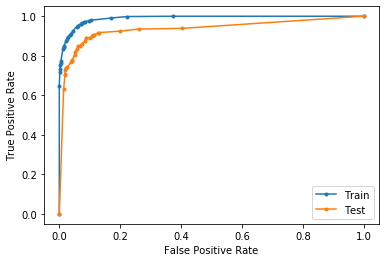

In [103]:
lr_probs = grid_dt.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('CART Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = grid_dt.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('CART Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Random Forest Classifier (bagging model)- 

In [104]:
rf= RandomForestClassifier(random_state= 100)
rf.fit(X_train_sc,y_train)

RandomForestClassifier(random_state=100)

In [105]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,rf.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,rf.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,rf.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,rf.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,rf.predict(X_train_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,rf.predict(X_test_sc)))

Train Accuracy is : 1.0

Test Accuracy is : 0.9574193548387097

Train ROC-AUC score is : 0.9999999999999999

Test ROC-AUC score is : 0.987393104384417

Confusion matrix for train set :  
 [[2969    0]
 [   0  647]]

Confusion matrix for test set :  
 [[1261   11]
 [  55  223]]


In [106]:
print('Classification report Train set :')
print(classification_report(y_train,rf.predict(X_train_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       647

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616



In [107]:
print('Classification report Test set :')
print(classification_report(y_test,rf.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1272
           1       0.95      0.80      0.87       278

    accuracy                           0.96      1550
   macro avg       0.96      0.90      0.92      1550
weighted avg       0.96      0.96      0.96      1550



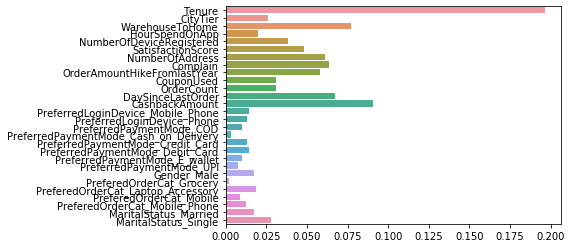

In [108]:
# Coefficient values- 
sns.barplot(x=[i for i in rf.feature_importances_],y=X_train.columns)
plt.show()

Hyperparameter tuning of Random Forest- 

In [109]:
param_rf={'max_depth':[5,6,7,8,9,10],'min_samples_split':[5,6,7,8,9,10],
    'n_estimators' :[100,200,300],'criterion':["gini","entropy"],'random_state': [100]}

In [110]:
param_rf

{'max_depth': [5, 6, 7, 8, 9, 10],
 'min_samples_split': [5, 6, 7, 8, 9, 10],
 'n_estimators': [100, 200, 300],
 'criterion': ['gini', 'entropy'],
 'random_state': [100]}

In [111]:
grid_rf=GridSearchCV(RandomForestClassifier(),param_grid=param_rf,refit=True,verbose=True)
grid_rf.fit(X_train_sc,y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [100]},
             verbose=True)

In [112]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 300,
 'random_state': 100}

In [113]:
results.loc['RF',:] = [accuracy_score(y_train,grid_rf.predict(X_train_sc)),
                          accuracy_score(y_test,grid_rf.predict(X_test_sc)),
                          roc_auc_score(y_train,grid_rf.predict_proba(X_train_sc)[:,1]),
                          roc_auc_score(y_test,grid_rf.predict_proba(X_test_sc)[:,1])]




print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_rf.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_rf.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_rf.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_rf.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_rf.predict(X_train_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_rf.predict(X_test_sc)))

Train Accuracy is : 0.9715154867256637

Test Accuracy is : 0.9374193548387096

Train ROC-AUC score is : 0.9977349666283695

Test ROC-AUC score is : 0.9741046785213339

Confusion matrix for train set :  
 [[2966    3]
 [ 100  547]]

Confusion matrix for test set :  
 [[1262   10]
 [  87  191]]


In [114]:
results.loc['RF']  # Check 

Train_Accuracy    0.971515
Test_Accuracy     0.937419
Train_ROC-AUC     0.997735
Test_ROC-AUC      0.974105
Name: RF, dtype: float64

In [115]:
print('Classification report Train set :')
print(classification_report(y_train,grid_rf.predict(X_train_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2969
           1       0.99      0.85      0.91       647

    accuracy                           0.97      3616
   macro avg       0.98      0.92      0.95      3616
weighted avg       0.97      0.97      0.97      3616



In [116]:
print('Classification report Test set :')
print(classification_report(y_test,grid_rf.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1272
           1       0.95      0.69      0.80       278

    accuracy                           0.94      1550
   macro avg       0.94      0.84      0.88      1550
weighted avg       0.94      0.94      0.93      1550



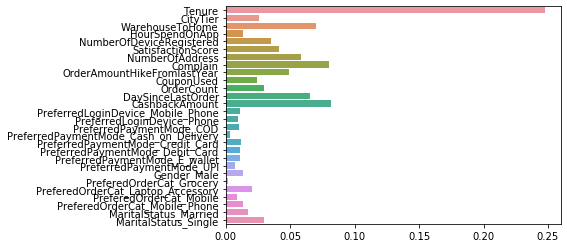

In [117]:
# Feature importance- (Higher the better) 
sns.barplot(x=[i for i in grid_rf.best_estimator_.feature_importances_],y=X_train.columns)
plt.show()

RF Train: ROC AUC=0.998
RF Train: ROC AUC=0.974


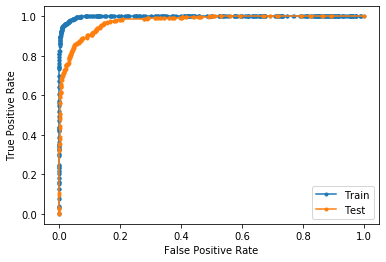

In [118]:

lr_probs = grid_rf.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('RF Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

lr_probs = grid_rf.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('RF Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Inferences- 
1. Un-tuned Random Forest models usually suffer from overfitting , just like we observed. 
2. Reduced difference in ROC AUC scores , and in Accuracy scores were observed after Hyperparameter tuning.
3. Importance of predictors have significantly changed as well. For eg. Tenure, cashback amount, complaint, warehousetohome and day since last order are significant predicters.
4. Best Hyperparameter values - 'criterion': 'entropy','max_depth': 6, 'min_samples_split': 8, 'n_estimators': 300


## Boosting  Classifier - 

In [119]:
gbc= GradientBoostingClassifier(random_state = 100)
gbc.fit(X_train_sc,y_train)

GradientBoostingClassifier(random_state=100)

In [120]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,gbc.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,gbc.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,gbc.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,gbc.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,gbc.predict(X_train_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,gbc.predict(X_test_sc)))

Train Accuracy is : 0.9350110619469026

Test Accuracy is : 0.9103225806451613

Train ROC-AUC score is : 0.9612768312229982

Test ROC-AUC score is : 0.9369881453327905

Confusion matrix for train set :  
 [[2914   55]
 [ 180  467]]

Confusion matrix for test set :  
 [[1238   34]
 [ 105  173]]


In [121]:
print('Classification report Train set :')
print(classification_report(y_train,gbc.predict(X_train_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2969
           1       0.89      0.72      0.80       647

    accuracy                           0.94      3616
   macro avg       0.92      0.85      0.88      3616
weighted avg       0.93      0.94      0.93      3616



In [122]:
print('Classification report Test set :')
print(classification_report(y_test,gbc.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1272
           1       0.84      0.62      0.71       278

    accuracy                           0.91      1550
   macro avg       0.88      0.80      0.83      1550
weighted avg       0.91      0.91      0.90      1550



Hyperparameter tuning of Boosting Classifier- 

In [123]:
param_gbc={'learning_rate': [0.01,0.02,0.05,0.075], 'max_depth':[3,4,5,6,7,8],
            'min_samples_split': [9,10,11,12], 'n_estimators':[50,100],'random_state': [100]}    

In [124]:
grid_gbc_2=GridSearchCV(GradientBoostingClassifier(),param_grid=param_gbc,refit=True,verbose=True)
grid_gbc_2.fit(X_train_sc,y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.075],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [9, 10, 11, 12],
                         'n_estimators': [50, 100], 'random_state': [100]},
             verbose=True)

In [125]:
grid_gbc_2.best_params_

{'learning_rate': 0.075,
 'max_depth': 8,
 'min_samples_split': 12,
 'n_estimators': 100,
 'random_state': 100}

In [126]:
results.loc['GB',:] = [accuracy_score(y_train,grid_gbc_2.predict(X_train_sc)),
                          accuracy_score(y_test,grid_gbc_2.predict(X_test_sc)),
                          roc_auc_score(y_train,grid_gbc_2.predict_proba(X_train_sc)[:,1]),
                          roc_auc_score(y_test,grid_gbc_2.predict_proba(X_test_sc)[:,1])]


print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_gbc_2.predict(X_train_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_gbc_2.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_gbc_2.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_gbc_2.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_gbc_2.predict(X_train_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_gbc_2.predict(X_test_sc)))

Train Accuracy is : 1.0

Test Accuracy is : 0.9716129032258064

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.9888664540066061

Confusion matrix for train set :  
 [[2969    0]
 [   0  647]]

Confusion matrix for test set :  
 [[1261   11]
 [  33  245]]


In [127]:
print('Classification report Train set :')
print(classification_report(y_train,grid_gbc_2.predict(X_train_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       647

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616



In [128]:
print('Classification report Test set :')
print(classification_report(y_test,grid_gbc_2.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1272
           1       0.96      0.88      0.92       278

    accuracy                           0.97      1550
   macro avg       0.97      0.94      0.95      1550
weighted avg       0.97      0.97      0.97      1550



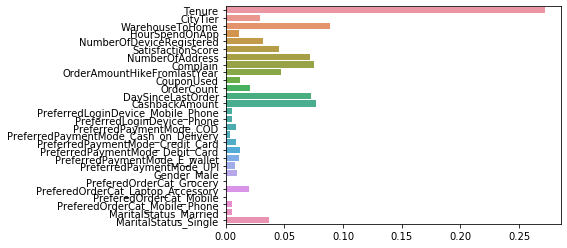

In [129]:
# Feature importance- (Higher the better) 
sns.barplot(x=[i for i in grid_gbc_2.best_estimator_.feature_importances_],y=X_train.columns)
plt.show()

Boosting Classifier Train: ROC AUC=1.000
Boosting Classifier Test: ROC AUC=0.989


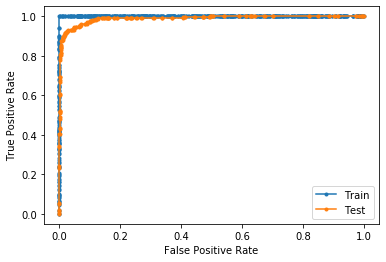

In [130]:
lr_probs =grid_gbc_2.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Boosting Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

lr_probs =grid_gbc_2.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Inferences- 
1. Both un-tuned as well as tuned Gradient Boosting models suffer from a certain degree of overfitting
2. 'Tenure' again is a very good predictor 
3. Best parameters (from the selected range) obtained from Grid Search are :  'learning_rate': 0.02, 'max_depth': 8, 'min_samples_split': 12, 'n_estimators': 50 

Plotting the combined ROC-AUC curves for all the models (Test Set)- 

Boosting Classifier: ROC AUC=0.989
RF: ROC AUC=0.974
DT CART : ROC AUC=0.935
Naive Bayes: ROC AUC=0.810
KNN Classifier: ROC AUC=0.940
LDA: ROC AUC=0.894
Logistic: ROC AUC=0.901


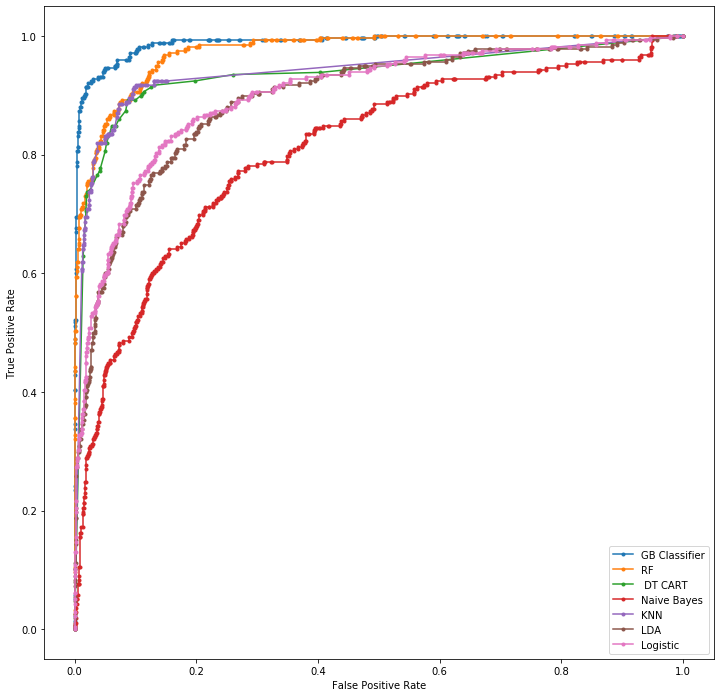

In [131]:
plt.figure(figsize=(12,12))

# Gradient boosting classifier - 
lr_probs =grid_gbc_2.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='GB Classifier')


# Random Forest Classifier- 
lr_probs = grid_rf.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('RF: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='RF')
 

# Decision Tree CART      
lr_probs = grid_dt.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('DT CART : ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label=' DT CART ')


 



# Naive Bayes 
lr_probs = naiv_b.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')


# KNN Classifier- 
lr_probs = grid_knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')


# LDA - 
lr_probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('LDA: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='LDA')


# Logistic Regression - 
lr_probs = log_r.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [132]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
Log_R,0.885785,0.888387,0.889015,0.900997
LDA,0.883020,0.887097,0.883870,0.894425
CART,0.960730,0.925161,0.989920,0.934531
NB,0.787887,0.783871,0.805505,0.810246
KNN,0.992533,0.936129,0.999794,0.939812
RF,0.971515,0.937419,0.997735,0.974105
GB,1.000000,0.971613,1.000000,0.988866


In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
sm = SMOTE(random_state=1)

In [135]:
y_train.value_counts()

0    2969
1     647
Name: Churn, dtype: int64

In [136]:
573/(2699 + 573)

0.17512224938875307

In [137]:
X_train_res , y_train_res = sm.fit_sample(X_train, y_train)

In [138]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 2969
After OverSampling, counts of label '0': 2969


In [139]:
sm = SMOTE(random_state=1, sampling_strategy= 0.35)

In [140]:
X_train_res , y_train_res = sm.fit_sample(X_train, y_train)

In [141]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 1039
After OverSampling, counts of label '0': 2969


In [142]:
944/(2699 + 944)

0.2591270930551743

In [143]:
944/2699

0.3497591700629863

In [144]:
# creating a DataFrame to store results - 
results_afterSMOTE = pd.DataFrame(dtype='int',columns=[['Train_Accuracy','Test_Accuracy','Train_ROC-AUC','Test_ROC-AUC']],
                       index=['Log_R','LDA','CART','NB','KNN','RF','GB'])

In [145]:
results_afterSMOTE

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
Log_R,NaN,NaN,NaN,NaN
LDA,NaN,NaN,NaN,NaN
CART,NaN,NaN,NaN,NaN
NB,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
RF,NaN,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN


#### Logistic Regression

In [146]:
log_r1=LogisticRegression(random_state=100,max_iter=10000)
log_r1.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=10000, random_state=100)

In [147]:
results_afterSMOTE.loc['Log_R',:] = [accuracy_score(y_train_res,log_r1.predict(X_train_res)),accuracy_score(y_test,log_r1.predict(X_test)),
               roc_auc_score(y_train_res,log_r1.predict_proba(X_train_res)[:,1]),roc_auc_score(y_test,log_r1.predict_proba(X_test)[:,1])]
print("Train Accuracy is : {}".format(accuracy_score(y_train_res,log_r1.predict(X_train_res))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,log_r1.predict(X_test))))



print("\n Train ROC-AUC score is : {}".format(roc_auc_score(y_train_res,log_r1.predict_proba(X_train_res)[:,1])))
print("\n Test ROC-AUC score is : {}".format(roc_auc_score(y_test,log_r1.predict_proba(X_test)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,log_r1.predict(X_train_res)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,log_r1.predict(X_test)))



Train Accuracy is : 0.8493013972055888

Test Accuracy is : 0.8716129032258064

 Train ROC-AUC score is : 0.8994155519774273

 Test ROC-AUC score is : 0.8861194063617032

Confusion matrix for train set :  
 [[2744  225]
 [ 379  660]]

Confusion matrix for test set :  
 [[1183   89]
 [ 110  168]]


In [148]:
print('Classification report Train set :')
print(classification_report(y_train_res,log_r1.predict(X_train_res)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2969
           1       0.75      0.64      0.69      1039

    accuracy                           0.85      4008
   macro avg       0.81      0.78      0.79      4008
weighted avg       0.84      0.85      0.85      4008



In [149]:
print('Classification report Test set :')
print(classification_report(y_test,log_r1.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1272
           1       0.65      0.60      0.63       278

    accuracy                           0.87      1550
   macro avg       0.78      0.77      0.78      1550
weighted avg       0.87      0.87      0.87      1550



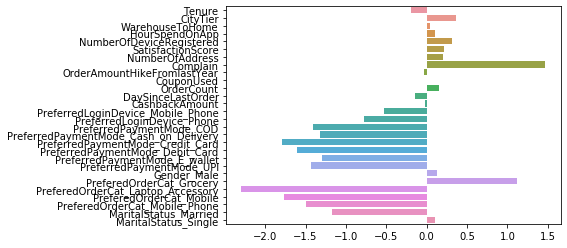

In [150]:
sns.barplot(x=[i for i in log_r1.coef_[0]],y=X_train_res.columns)
plt.show()

Logistic on Train: ROC AUC=0.899
Logistic on Test: ROC AUC=0.886


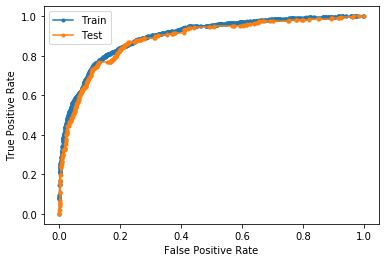

In [151]:
lr_probs = log_r1.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_res, lr_probs)
# summarize scores
print('Logistic on Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_res, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = log_r1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic on Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### LDA

In [152]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

In [153]:
results_afterSMOTE.loc['LDA',:] = [accuracy_score(y_train_res,lda.predict(X_train_res)),
                          accuracy_score(y_test,lda.predict(X_test)),
                          roc_auc_score(y_train_res,lda.predict_proba(X_train_res)[:,1]),
                          roc_auc_score(y_test,lda.predict_proba(X_test)[:,1])]



print("Train Accuracy is : {}".format(accuracy_score(y_train_res,lda.predict(X_train_res))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,lda.predict(X_test))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,lda.predict_proba(X_train_res)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,lda.predict_proba(X_test)[:,1])))


print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,lda.predict(X_train_res)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,lda.predict(X_test)))


Train Accuracy is : 0.8488023952095808

Test Accuracy is : 0.864516129032258

Train ROC-AUC score is : 0.8946100400318854

Test ROC-AUC score is : 0.8732664811546988

Confusion matrix for train set :  
 [[2774  195]
 [ 411  628]]

Confusion matrix for test set :  
 [[1191   81]
 [ 129  149]]


In [154]:
print('Classification report Train set :')
print(classification_report(y_train_res,lda.predict(X_train_res)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2969
           1       0.76      0.60      0.67      1039

    accuracy                           0.85      4008
   macro avg       0.82      0.77      0.79      4008
weighted avg       0.84      0.85      0.84      4008



In [155]:
print('Classification report Test set :')
print(classification_report(y_test,lda.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1272
           1       0.65      0.54      0.59       278

    accuracy                           0.86      1550
   macro avg       0.78      0.74      0.75      1550
weighted avg       0.86      0.86      0.86      1550



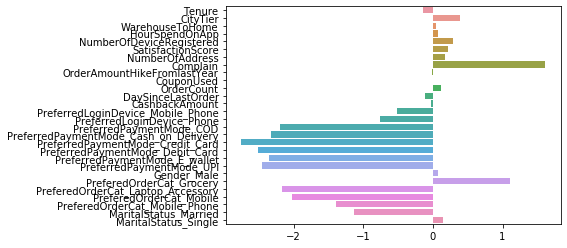

In [156]:
# Coefficient values- 
sns.barplot(x=[i for i in lda.coef_[0]],y=X_train_res.columns)
plt.show()

LDA Train: ROC AUC=0.895
LDA Test: ROC AUC=0.873


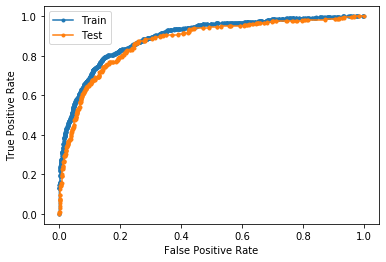

In [157]:
lr_probs = lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_res, lr_probs)
# summarize scores
print('LDA Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_res, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('LDA Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### KNN Classifier

In [158]:
X_train_res.columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile_Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash_on_Delivery',
       'PreferredPaymentMode_Credit_Card', 'PreferredPaymentMode_Debit_Card',
       'PreferredPaymentMode_E_wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop_Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile_Phone', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [159]:
sc=StandardScaler()

In [160]:
X_train_res_sc= pd.DataFrame(sc.fit_transform(X_train_res),columns=X_train_res.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [161]:
knn=KNeighborsClassifier()
knn.fit(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']],y_train_res)

KNeighborsClassifier()

In [162]:
print("Train Accuracy is : {}".format(accuracy_score(y_train_res,knn.predict(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']]))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']]))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,knn.predict_proba(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,knn.predict(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Train Accuracy is : 0.9014471057884231

Test Accuracy is : 0.8412903225806452

Train ROC-AUC score is : 0.9584941086770546

Test ROC-AUC score is : 0.8499714379439844

Confusion matrix for train set :  
 [[2812  157]
 [ 238  801]]

Confusion matrix for test set :  
 [[1141  131]
 [ 115  163]]


In [163]:
print('Classification report Train set :')
print(classification_report(y_train_res,knn.predict(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2969
           1       0.84      0.77      0.80      1039

    accuracy                           0.90      4008
   macro avg       0.88      0.86      0.87      4008
weighted avg       0.90      0.90      0.90      4008



In [164]:
print('Classification report Train set :')
print(classification_report(y_test,knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1272
           1       0.55      0.59      0.57       278

    accuracy                           0.84      1550
   macro avg       0.73      0.74      0.74      1550
weighted avg       0.84      0.84      0.84      1550



Hyper parameter tuning of KNN Classifier- 

In [165]:
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
         'weights':['uniform', 'distance'],'p':[1,2,3,4]}

In [166]:
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1)
grid_knn.fit(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']],y_train_res)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [167]:
grid_knn.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [168]:


print("Train Accuracy is : {}".format(accuracy_score(y_train_res,grid_knn.predict(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']]))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']]))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,grid_knn.predict_proba(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,grid_knn.predict(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Train Accuracy is : 0.9865269461077845

Test Accuracy is : 0.9148387096774193

Train ROC-AUC score is : 0.996662658831668

Test ROC-AUC score is : 0.9270522261436135

Confusion matrix for train set :  
 [[2961    8]
 [  46  993]]

Confusion matrix for test set :  
 [[1190   82]
 [  50  228]]


In [169]:
print('Classification report Train set :')
print(classification_report(y_train_res,grid_knn.predict(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2969
           1       0.99      0.96      0.97      1039

    accuracy                           0.99      4008
   macro avg       0.99      0.98      0.98      4008
weighted avg       0.99      0.99      0.99      4008



In [170]:
print('Classification report Test set :')
print(classification_report(y_test,grid_knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1272
           1       0.74      0.82      0.78       278

    accuracy                           0.91      1550
   macro avg       0.85      0.88      0.86      1550
weighted avg       0.92      0.91      0.92      1550



In [171]:
grid_knn.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

KNN Classifier Train: ROC AUC=0.997
KNN Classifier Test: ROC AUC=0.927


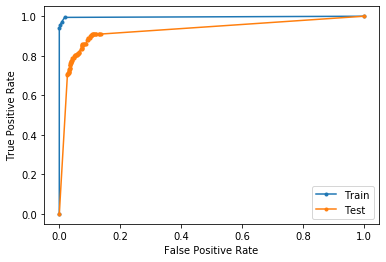

In [172]:
results_afterSMOTE.loc['KNN',:] = [accuracy_score(y_train_res,grid_knn.predict(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])),
                          accuracy_score(y_test,grid_knn.predict(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])),
                          roc_auc_score(y_train_res,grid_knn.predict_proba(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1]),
                          roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])[:,1])]

lr_probs = grid_knn.predict_proba(X_train_res_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_res, lr_probs)
# summarize scores
print('KNN Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_res, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = grid_knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Naive Bayes

In [173]:
naiv_b=GaussianNB()
naiv_b.fit(X_train_res_sc,y_train_res)

GaussianNB()

In [174]:
results_afterSMOTE.loc['NB',:] = [accuracy_score(y_train_res,naiv_b.predict(X_train_res_sc)),
                          accuracy_score(y_test,naiv_b.predict(X_test_sc)),
                          roc_auc_score(y_train_res,naiv_b.predict_proba(X_train_res_sc)[:,1]),
                          roc_auc_score(y_test,naiv_b.predict_proba(X_test_sc)[:,1])]


print("Train Accuracy is : {}".format(accuracy_score(y_train_res,naiv_b.predict(X_train_res_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,naiv_b.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,naiv_b.predict_proba(X_train_res_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,naiv_b.predict_proba(X_test_sc)[:,1])))


print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,naiv_b.predict(X_train_res_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,naiv_b.predict(X_test_sc)))

Train Accuracy is : 0.7340319361277445

Test Accuracy is : 0.727741935483871

Train ROC-AUC score is : 0.7967440906045175

Test ROC-AUC score is : 0.786573571331614

Confusion matrix for train set :  
 [[2183  786]
 [ 280  759]]

Confusion matrix for test set :  
 [[926 346]
 [ 76 202]]


In [175]:
results_afterSMOTE.loc['NB']

Train_Accuracy    0.734032
Test_Accuracy     0.727742
Train_ROC-AUC     0.796744
Test_ROC-AUC      0.786574
Name: NB, dtype: float64

In [176]:
print('Classification report Train set :')
print(classification_report(y_train_res,naiv_b.predict(X_train_res_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.89      0.74      0.80      2969
           1       0.49      0.73      0.59      1039

    accuracy                           0.73      4008
   macro avg       0.69      0.73      0.70      4008
weighted avg       0.78      0.73      0.75      4008



In [177]:
print('Classification report Test set :')
print(classification_report(y_test,naiv_b.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1272
           1       0.37      0.73      0.49       278

    accuracy                           0.73      1550
   macro avg       0.65      0.73      0.65      1550
weighted avg       0.82      0.73      0.76      1550



Naive Bayes on Train: ROC AUC=0.797
Naive Bayes: ROC AUC=0.787


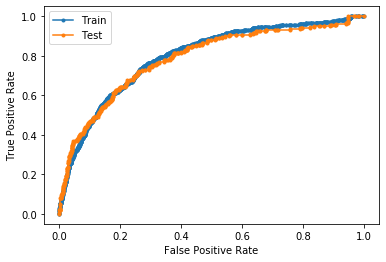

In [178]:
lr_probs = naiv_b.predict_proba(X_train_res_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_res, lr_probs)
# summarize scores
print('Naive Bayes on Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_res, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = naiv_b.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Decision Tree

In [179]:
dt = DecisionTreeClassifier(random_state=100 )  
dt.fit(X_train_res_sc,y_train_res)

DecisionTreeClassifier(random_state=100)

In [180]:
print("Train Accuracy is : {}".format(accuracy_score(y_train_res,dt.predict(X_train_res_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,dt.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,dt.predict_proba(X_train_res_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,dt.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,dt.predict(X_train_res_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,dt.predict(X_test_sc)))

Train Accuracy is : 1.0

Test Accuracy is : 0.9109677419354839

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.872669788697344

Confusion matrix for train set :  
 [[2969    0]
 [   0 1039]]

Confusion matrix for test set :  
 [[1186   86]
 [  52  226]]


In [181]:
print('Classification report Train set :')
print(classification_report(y_train_res,dt.predict(X_train_res_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00      1039

    accuracy                           1.00      4008
   macro avg       1.00      1.00      1.00      4008
weighted avg       1.00      1.00      1.00      4008



In [182]:
print('Classification report Test set :')
print(classification_report(y_test,dt.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1272
           1       0.72      0.81      0.77       278

    accuracy                           0.91      1550
   macro avg       0.84      0.87      0.86      1550
weighted avg       0.92      0.91      0.91      1550



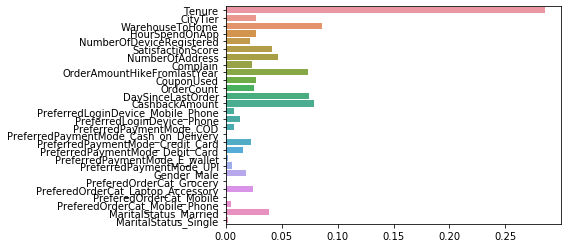

In [183]:
# Coefficient values- 
sns.barplot(x=[i for i in dt.feature_importances_],y=X_train_res.columns)
plt.show()

Hyperparameter tuning of Decision Tree  - 

In [184]:
parameters = {'max_depth':[5,6,7,8,9,10],'min_samples_split':[5,6,7,8,9,10],
              'criterion':["gini","entropy"],'random_state': [100]}

In [185]:
grid_dt = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,refit=True,verbose=1)
grid_dt.fit(X_train_res_sc,y_train_res)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10],
                         'random_state': [100]},
             verbose=1)

In [186]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 5,
 'random_state': 100}

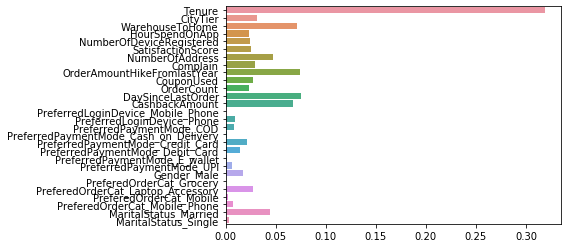

In [187]:
# Coefficient values- 
sns.barplot(x=[i for i in grid_dt.best_estimator_.feature_importances_],y=X_train_res.columns)
plt.show()

In [188]:
results_afterSMOTE.loc['CART',:] = [accuracy_score(y_train_res,grid_dt.predict(X_train_res_sc)),
                          accuracy_score(y_test,grid_dt.predict(X_test_sc)),
                          roc_auc_score(y_train_res,grid_dt.predict_proba(X_train_res_sc)[:,1]),
                          roc_auc_score(y_test,grid_dt.predict_proba(X_test_sc)[:,1])]


print("Train Accuracy is : {}".format(accuracy_score(y_train_res,grid_dt.predict(X_train_res_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_dt.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,grid_dt.predict_proba(X_train_res_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_dt.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,grid_dt.predict(X_train_res_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_dt.predict(X_test_sc)))

Train Accuracy is : 0.9660678642714571

Test Accuracy is : 0.8980645161290323

Train ROC-AUC score is : 0.9922690062308921

Test ROC-AUC score is : 0.8912308832179539

Confusion matrix for train set :  
 [[2934   35]
 [ 101  938]]

Confusion matrix for test set :  
 [[1182   90]
 [  68  210]]


In [189]:
results_afterSMOTE.loc['CART']

Train_Accuracy    0.966068
Test_Accuracy     0.898065
Train_ROC-AUC     0.992269
Test_ROC-AUC      0.891231
Name: CART, dtype: float64

In [190]:
print('Classification report Train set :')
print(classification_report(y_train_res,grid_dt.predict(X_train_res_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2969
           1       0.96      0.90      0.93      1039

    accuracy                           0.97      4008
   macro avg       0.97      0.95      0.95      4008
weighted avg       0.97      0.97      0.97      4008



In [191]:
print('Classification report Test set :')
print(classification_report(y_test,grid_dt.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1272
           1       0.70      0.76      0.73       278

    accuracy                           0.90      1550
   macro avg       0.82      0.84      0.83      1550
weighted avg       0.90      0.90      0.90      1550



CART Train: ROC AUC=0.992
CART Test: ROC AUC=0.891


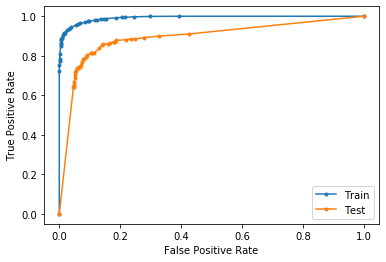

In [192]:
lr_probs = grid_dt.predict_proba(X_train_res_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_res, lr_probs)
# summarize scores
print('CART Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_res, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = grid_dt.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('CART Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Random Forest Classifier (bagging model)- 

In [193]:
rf= RandomForestClassifier(random_state= 100)
rf.fit(X_train_res_sc,y_train_res)

RandomForestClassifier(random_state=100)

In [194]:
print("Train Accuracy is : {}".format(accuracy_score(y_train_res,rf.predict(X_train_res_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,rf.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,rf.predict_proba(X_train_res_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,rf.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,rf.predict(X_train_res_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,rf.predict(X_test_sc)))

Train Accuracy is : 1.0

Test Accuracy is : 0.947741935483871

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.9813625514682593

Confusion matrix for train set :  
 [[2969    0]
 [   0 1039]]

Confusion matrix for test set :  
 [[1251   21]
 [  60  218]]


In [195]:
print('Classification report Train set :')
print(classification_report(y_train_res,rf.predict(X_train_res_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00      1039

    accuracy                           1.00      4008
   macro avg       1.00      1.00      1.00      4008
weighted avg       1.00      1.00      1.00      4008



In [196]:
print('Classification report Test set :')
print(classification_report(y_test,rf.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1272
           1       0.91      0.78      0.84       278

    accuracy                           0.95      1550
   macro avg       0.93      0.88      0.91      1550
weighted avg       0.95      0.95      0.95      1550



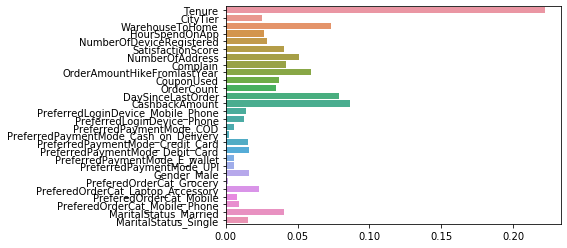

In [197]:
# Coefficient values- 
sns.barplot(x=[i for i in rf.feature_importances_],y=X_train_res.columns)
plt.show()

Hyperparameter tuning of Random Forest- 

In [198]:
param_rf={'max_depth':[5,6,7,8,9,10],'min_samples_split':[5,6,7,8,9,10],
    'n_estimators' :[100,200,300],'criterion':["gini","entropy"],'random_state': [100]}

In [199]:
param_rf

{'max_depth': [5, 6, 7, 8, 9, 10],
 'min_samples_split': [5, 6, 7, 8, 9, 10],
 'n_estimators': [100, 200, 300],
 'criterion': ['gini', 'entropy'],
 'random_state': [100]}

In [200]:
grid_rf=GridSearchCV(RandomForestClassifier(),param_grid=param_rf,refit=True,verbose=True)
grid_rf.fit(X_train_res_sc,y_train_res)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [100]},
             verbose=True)

In [201]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 6,
 'n_estimators': 300,
 'random_state': 100}

In [202]:
results_afterSMOTE.loc['RF',:] = [accuracy_score(y_train_res,grid_rf.predict(X_train_res_sc)),
                          accuracy_score(y_test,grid_rf.predict(X_test_sc)),
                          roc_auc_score(y_train_res,grid_rf.predict_proba(X_train_res_sc)[:,1]),
                          roc_auc_score(y_test,grid_rf.predict_proba(X_test_sc)[:,1])]




print("Train Accuracy is : {}".format(accuracy_score(y_train_res,grid_rf.predict(X_train_res_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_rf.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,grid_rf.predict_proba(X_train_res_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_rf.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,grid_rf.predict(X_train_res_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_rf.predict(X_test_sc)))

Train Accuracy is : 0.9680638722554891

Test Accuracy is : 0.9232258064516129

Train ROC-AUC score is : 0.9969673796377129

Test ROC-AUC score is : 0.9638025428713634

Confusion matrix for train set :  
 [[2951   18]
 [ 110  929]]

Confusion matrix for test set :  
 [[1236   36]
 [  83  195]]


In [203]:
results.loc['RF']  # Check 

Train_Accuracy    0.971515
Test_Accuracy     0.937419
Train_ROC-AUC     0.997735
Test_ROC-AUC      0.974105
Name: RF, dtype: float64

In [204]:
print('Classification report Train set :')
print(classification_report(y_train_res,grid_rf.predict(X_train_res_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2969
           1       0.98      0.89      0.94      1039

    accuracy                           0.97      4008
   macro avg       0.97      0.94      0.96      4008
weighted avg       0.97      0.97      0.97      4008



In [205]:
print('Classification report Test set :')
print(classification_report(y_test,grid_rf.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1272
           1       0.84      0.70      0.77       278

    accuracy                           0.92      1550
   macro avg       0.89      0.84      0.86      1550
weighted avg       0.92      0.92      0.92      1550



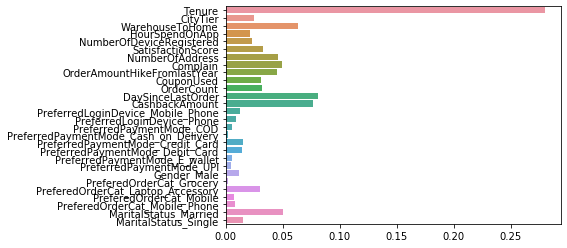

In [206]:
# Feature importance- (Higher the better) 
sns.barplot(x=[i for i in grid_rf.best_estimator_.feature_importances_],y=X_train_res.columns)
plt.show()

RF Train: ROC AUC=0.997
RF Train: ROC AUC=0.964


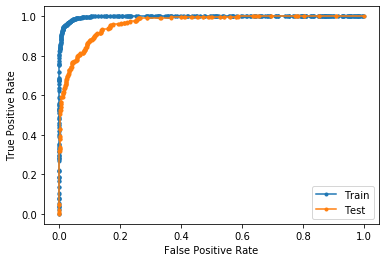

In [207]:

lr_probs = grid_rf.predict_proba(X_train_res_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_res, lr_probs)
# summarize scores
print('RF Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_res, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

lr_probs = grid_rf.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('RF Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Boosting  Classifier - 

In [208]:
gbc= GradientBoostingClassifier(random_state = 100)
gbc.fit(X_train_res_sc,y_train_res)

GradientBoostingClassifier(random_state=100)

In [209]:
print("Train Accuracy is : {}".format(accuracy_score(y_train_res,gbc.predict(X_train_res_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,gbc.predict(X_test_sc))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,gbc.predict_proba(X_train_res_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,gbc.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,gbc.predict(X_train_res_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,gbc.predict(X_test_sc)))

Train Accuracy is : 0.9201596806387226

Test Accuracy is : 0.9045161290322581

Train ROC-AUC score is : 0.9660469704430543

Test ROC-AUC score is : 0.9275400434369485

Confusion matrix for train set :  
 [[2864  105]
 [ 215  824]]

Confusion matrix for test set :  
 [[1212   60]
 [  88  190]]


In [210]:
print('Classification report Train set :')
print(classification_report(y_train_res,gbc.predict(X_train_res_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2969
           1       0.89      0.79      0.84      1039

    accuracy                           0.92      4008
   macro avg       0.91      0.88      0.89      4008
weighted avg       0.92      0.92      0.92      4008



In [211]:
print('Classification report Test set :')
print(classification_report(y_test,gbc.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1272
           1       0.76      0.68      0.72       278

    accuracy                           0.90      1550
   macro avg       0.85      0.82      0.83      1550
weighted avg       0.90      0.90      0.90      1550



Hyperparameter tuning of Boosting Classifier- 

In [212]:
param_gbc={'learning_rate': [0.01,0.02,0.05,0.075], 'max_depth':[3,4,5,6,7,8],
            'min_samples_split': [9,10,11,12], 'n_estimators':[50,100],'random_state': [100]}    

In [213]:
grid_gbc_2=GridSearchCV(GradientBoostingClassifier(),param_grid=param_gbc,refit=True,verbose=True)
grid_gbc_2.fit(X_train_res_sc,y_train_res)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.075],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [9, 10, 11, 12],
                         'n_estimators': [50, 100], 'random_state': [100]},
             verbose=True)

In [214]:
grid_gbc_2.best_params_

{'learning_rate': 0.075,
 'max_depth': 8,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 100}

In [215]:
results_afterSMOTE.loc['GB',:] = [accuracy_score(y_train_res,grid_gbc_2.predict(X_train_res_sc)),
                          accuracy_score(y_test,grid_gbc_2.predict(X_test_sc)),
                          roc_auc_score(y_train_res,grid_gbc_2.predict_proba(X_train_res_sc)[:,1]),
                          roc_auc_score(y_test,grid_gbc_2.predict_proba(X_test_sc)[:,1])]


print("Train Accuracy is : {}".format(accuracy_score(y_train_res,grid_gbc_2.predict(X_train_res_sc))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_gbc_2.predict(X_test_sc))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_res,grid_gbc_2.predict_proba(X_train_res_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_gbc_2.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_res,grid_gbc_2.predict(X_train_res_sc)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_gbc_2.predict(X_test_sc)))

Train Accuracy is : 1.0

Test Accuracy is : 0.9554838709677419

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.984853626532736

Confusion matrix for train set :  
 [[2969    0]
 [   0 1039]]

Confusion matrix for test set :  
 [[1249   23]
 [  46  232]]


In [216]:
print('Classification report Train set :')
print(classification_report(y_train_res,grid_gbc_2.predict(X_train_res_sc)))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00      1039

    accuracy                           1.00      4008
   macro avg       1.00      1.00      1.00      4008
weighted avg       1.00      1.00      1.00      4008



In [217]:
print('Classification report Test set :')
print(classification_report(y_test,grid_gbc_2.predict(X_test_sc)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1272
           1       0.91      0.83      0.87       278

    accuracy                           0.96      1550
   macro avg       0.94      0.91      0.92      1550
weighted avg       0.95      0.96      0.95      1550



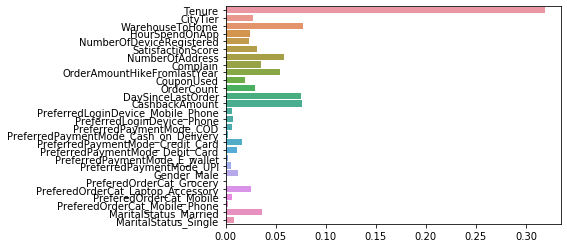

In [218]:
# Feature importance- (Higher the better) 
sns.barplot(x=[i for i in grid_gbc_2.best_estimator_.feature_importances_],y=X_train_res.columns)
plt.show()

Boosting Classifier Train: ROC AUC=1.000
Boosting Classifier Test: ROC AUC=0.985


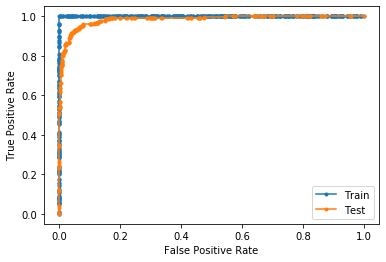

In [219]:
lr_probs =grid_gbc_2.predict_proba(X_train_res_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_res, lr_probs)
# summarize scores
print('Boosting Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_res, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

lr_probs =grid_gbc_2.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Plotting the combined ROC-AUC curves for all the models (Test Set)- 

Boosting Classifier: ROC AUC=0.985
RF: ROC AUC=0.964
DT CART : ROC AUC=0.891
Naive Bayes: ROC AUC=0.787
KNN Classifier: ROC AUC=0.927
LDA: ROC AUC=0.873
Logistic: ROC AUC=0.886


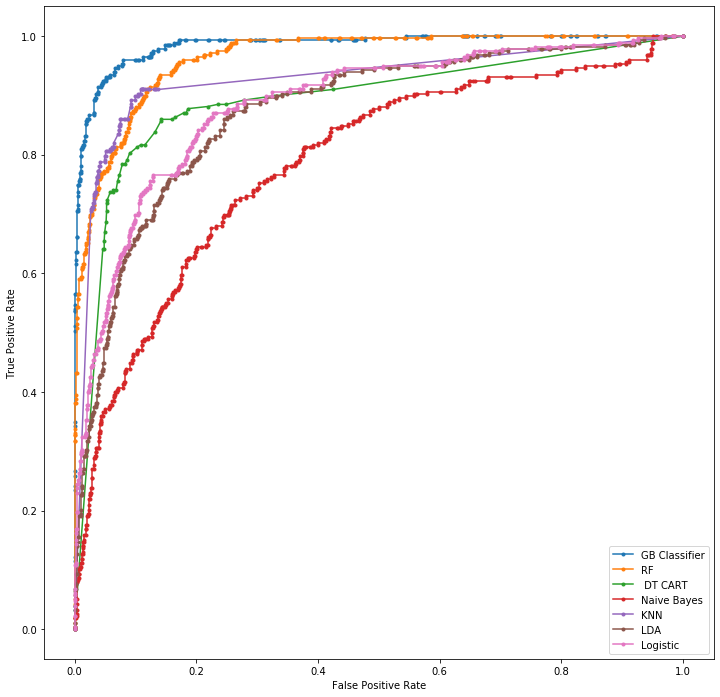

In [220]:
plt.figure(figsize=(12,12))

# Gradient boosting classifier - 
lr_probs =grid_gbc_2.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='GB Classifier')


# Random Forest Classifier- 
lr_probs = grid_rf.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('RF: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='RF')
 

# Decision Tree CART      
lr_probs = grid_dt.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('DT CART : ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label=' DT CART ')


 



# Naive Bayes 
lr_probs = naiv_b.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')


# KNN Classifier- 
lr_probs = grid_knn.predict_proba(X_test_sc[['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
                    'PreferredLoginDevice_Mobile_Phone','PreferredLoginDevice_Phone',
                   'PreferredPaymentMode_COD','PreferredPaymentMode_Cash_on_Delivery',
                   'PreferredPaymentMode_Debit_Card','PreferredPaymentMode_E_wallet',
                   'Gender_Male','PreferedOrderCat_Grocery',
                   'PreferedOrderCat_Laptop_Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile_Phone',
                    'MaritalStatus_Single']])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')


# LDA - 
lr_probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('LDA: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='LDA')


# Logistic Regression - 
lr_probs = log_r1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [221]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
Log_R,0.885785,0.888387,0.889015,0.900997
LDA,0.883020,0.887097,0.883870,0.894425
CART,0.960730,0.925161,0.989920,0.934531
NB,0.787887,0.783871,0.805505,0.810246
KNN,0.992533,0.936129,0.999794,0.939812
RF,0.971515,0.937419,0.997735,0.974105
GB,1.000000,0.971613,1.000000,0.988866


In [222]:
results_afterSMOTE

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
Log_R,0.849301,0.871613,0.899416,0.886119
LDA,0.848802,0.864516,0.894610,0.873266
CART,0.966068,0.898065,0.992269,0.891231
NB,0.734032,0.727742,0.796744,0.786574
KNN,0.986527,0.914839,0.996663,0.927052
RF,0.968064,0.923226,0.996967,0.963803
GB,1.000000,0.955484,1.000000,0.984854
